In [3]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 35337, done.
remote: Counting objects: 100% (3914/3914), done.
remote: Compressing objects: 100% (1670/1670), done.
remote: Total 35337 (delta 2680), reused 3309 (delta 2226), pack-reused 31423
Receiving objects: 100% (35337/35337), 29.71 MiB | 14.29 MiB/s, done.
Resolving deltas: 100% (25439/25439), done.


In [4]:
%cd ./ultralytics

/content/ultralytics


In [ ]:
!pip install -e .

Obtaining file:///content/ultralytics


In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import os
import torch
import yaml
from IPython.display import Image, clear_output  # to display images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.1+cu121 (NVIDIA A100-SXM4-40GB)


In [ ]:
data_dir = '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803'
data_yaml = '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/data.yaml'

In [ ]:
import os

# 특정 폴더 내의 파일 수를 세는 함수
def count_files_in_directory(directory):
    file_count = 0
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

# 각 'labels' 폴더의 파일 수 출력 함수
def count_files_in_labels_folders(label_folders):
    for folder in label_folders:
        file_count = count_files_in_directory(folder)
        print(f"{folder} 폴더의 파일 수: {file_count}개")

# 'labels' 폴더의 위치들
labels_folders = [
    '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/valid/images',
    '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/train/labels',
    '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/test/images'
]

# 각 'labels' 폴더의 파일 수 출력
count_files_in_labels_folders(labels_folders)



/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/valid/images 폴더의 파일 수: 2200개
/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/train/labels 폴더의 파일 수: 49297개
/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/test/images 폴더의 파일 수: 1156개


In [ ]:
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'names': ['beaf',
  'bellpepper',
  'carrot',
  'chicken',
  'chili',
  'cucumber',
  'egg',
  'eggplant',
  'fish',
  'garlic',
  'green_onion',
  'kimchi',
  'koreancabbage',
  'lettuce',
  'mungbeansprout',
  'mushroom',
  'onion',
  'pork',
  'potato',
  'pumpkin',
  'radish',
  'sausage',
  'shrimp',
  'squid',
  'tofu',
  'tomato',
  'bab',
  'bean_sprouts',
  'bread',
  'cut_mackerel',
  'fishcake',
  'garlic_clove',
  'ginger',
  'mackerel',
  'perilla',
  'sweet_potato'],
 'nc': 36,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'food-ingredients-ftnpv',
  'url': 'https://universe.roboflow.com/data-orccx/food-ingredients-ftnpv/dataset/4',
  'version': 4,
  'workspace': 'data-orccx'},
 'test': '../test/images',
 'train': '../train/images',
 'val': '../valid/images'}

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 73.7MB/s]


In [ ]:
model.train(data=data_yaml, epochs=3, imgsz=640, batch=32)

Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/data.yaml, epochs=3, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]


Overriding model.yaml nc=80 with nc=36

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/Data_Food_Ingredients_0803/train/labels... 49297 images, 2554 backgrounds, 0 corrupt: 100%|██████████| 51842/51842 [56:56<00:00, 15.17it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/Data_Food_Ingredients_0803/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 87, len(boxes) = 121344. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/Data_Food_Ingredients_0803/valid/labels.cache... 2200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2200/2200 [00:00<?, ?it/s]


Plotting labels to /content/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/ultralytics/runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      5.27G      1.261      2.839      1.637         12        640: 100%|██████████| 1621/1621 [04:47<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.17it/s]


                   all       2200       5368      0.553      0.524      0.525      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      4.63G      1.089      1.648      1.468         21        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.55it/s]


                   all       2200       5368      0.632      0.658      0.668      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      4.62G      1.018      1.399      1.406         14        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.66it/s]


                   all       2200       5368      0.712      0.718      0.748       0.52

3 epochs completed in 0.234 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/best.pt, 6.3MB

Validating /content/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,012,668 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.68it/s]


                   all       2200       5368      0.707       0.72      0.747       0.52
                  beaf        160        227      0.748      0.903      0.856      0.677
            bellpepper         22        103      0.851      0.728      0.767      0.542
                carrot        236       1070      0.741      0.797       0.82      0.505
               chicken        164        305      0.691      0.728      0.782      0.557
              cucumber        151        366      0.825      0.776       0.85      0.557
                   egg        133        577      0.965      0.956      0.989      0.794
              eggplant        159        337      0.824      0.848      0.898      0.596
                garlic         14         59      0.743      0.559      0.623       0.36
           green_onion        111        137      0.915       0.73      0.818      0.598
                kimchi         10         10      0.813      0.873      0.918       0.54
         koreancabbag

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  5,  6,  7,  9, 10, 11, 12, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c55a5a58d60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.0

In [ ]:
# 연습용 checkpoint_dir 생성
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/practice'
os.makedirs(checkpoint_dir, exist_ok=True)

# Checkpoinnt 생성
# 마지막 epoch에서의 weight-checkpoint와 최선의 epoch에서의 weight-checkpoint 생성
import shutil
best_model_path = '/content/ultralytics/runs/detect/train/weights/best.pt'
last_model_path = '/content/ultralytics/runs/detect/train/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0703/best.pt'
drive_last_model_path = '/content/drive/MyDrive/DAB/checkpoints/0703/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

Best model saved to /content/drive/MyDrive/DAB/checkpoints/0703/best.pt
Last model saved to /content/drive/MyDrive/DAB/checkpoints/0703/last.pt


In [ ]:
# best.pt와 last.pt 파일을 practice 디렉토리로 복사
shutil.copyfile(drive_best_model_path, os.path.join(checkpoint_dir, 'best.pt'))
shutil.copyfile(drive_last_model_path, os.path.join(checkpoint_dir, 'last.pt'))

'/content/drive/MyDrive/DAB/checkpoints/practice/last.pt'

In [ ]:
# Checkpoint에 저장되어 있는 모델 가져와서 추가 학습시키기
model = YOLO(os.path.join(checkpoint_dir, 'best.pt'))

In [ ]:
import os
# yolov8 실행결과 디렉토리 경로
result_directory = '/content/ultralytics/runs/detect/train'
# yolov8 실행결과 디렉토리의 파일 및 디렉토리 목록 출력
print(f"result_directory: {result_directory}")
for item in os.listdir(result_directory):
    print(item)

result_directory: /content/ultralytics/runs/detect/train
events.out.tfevents.1722845232.fd7be7c05a9d.353.0
labels_correlogram.jpg
results.png
confusion_matrix.png
labels.jpg
val_batch2_labels.jpg
results.csv
F1_curve.png
P_curve.png
R_curve.png
val_batch1_pred.jpg
val_batch2_pred.jpg
confusion_matrix_normalized.png
train_batch0.jpg
val_batch0_pred.jpg
args.yaml
weights
val_batch0_labels.jpg
train_batch1.jpg
train_batch2.jpg
val_batch1_labels.jpg
PR_curve.png


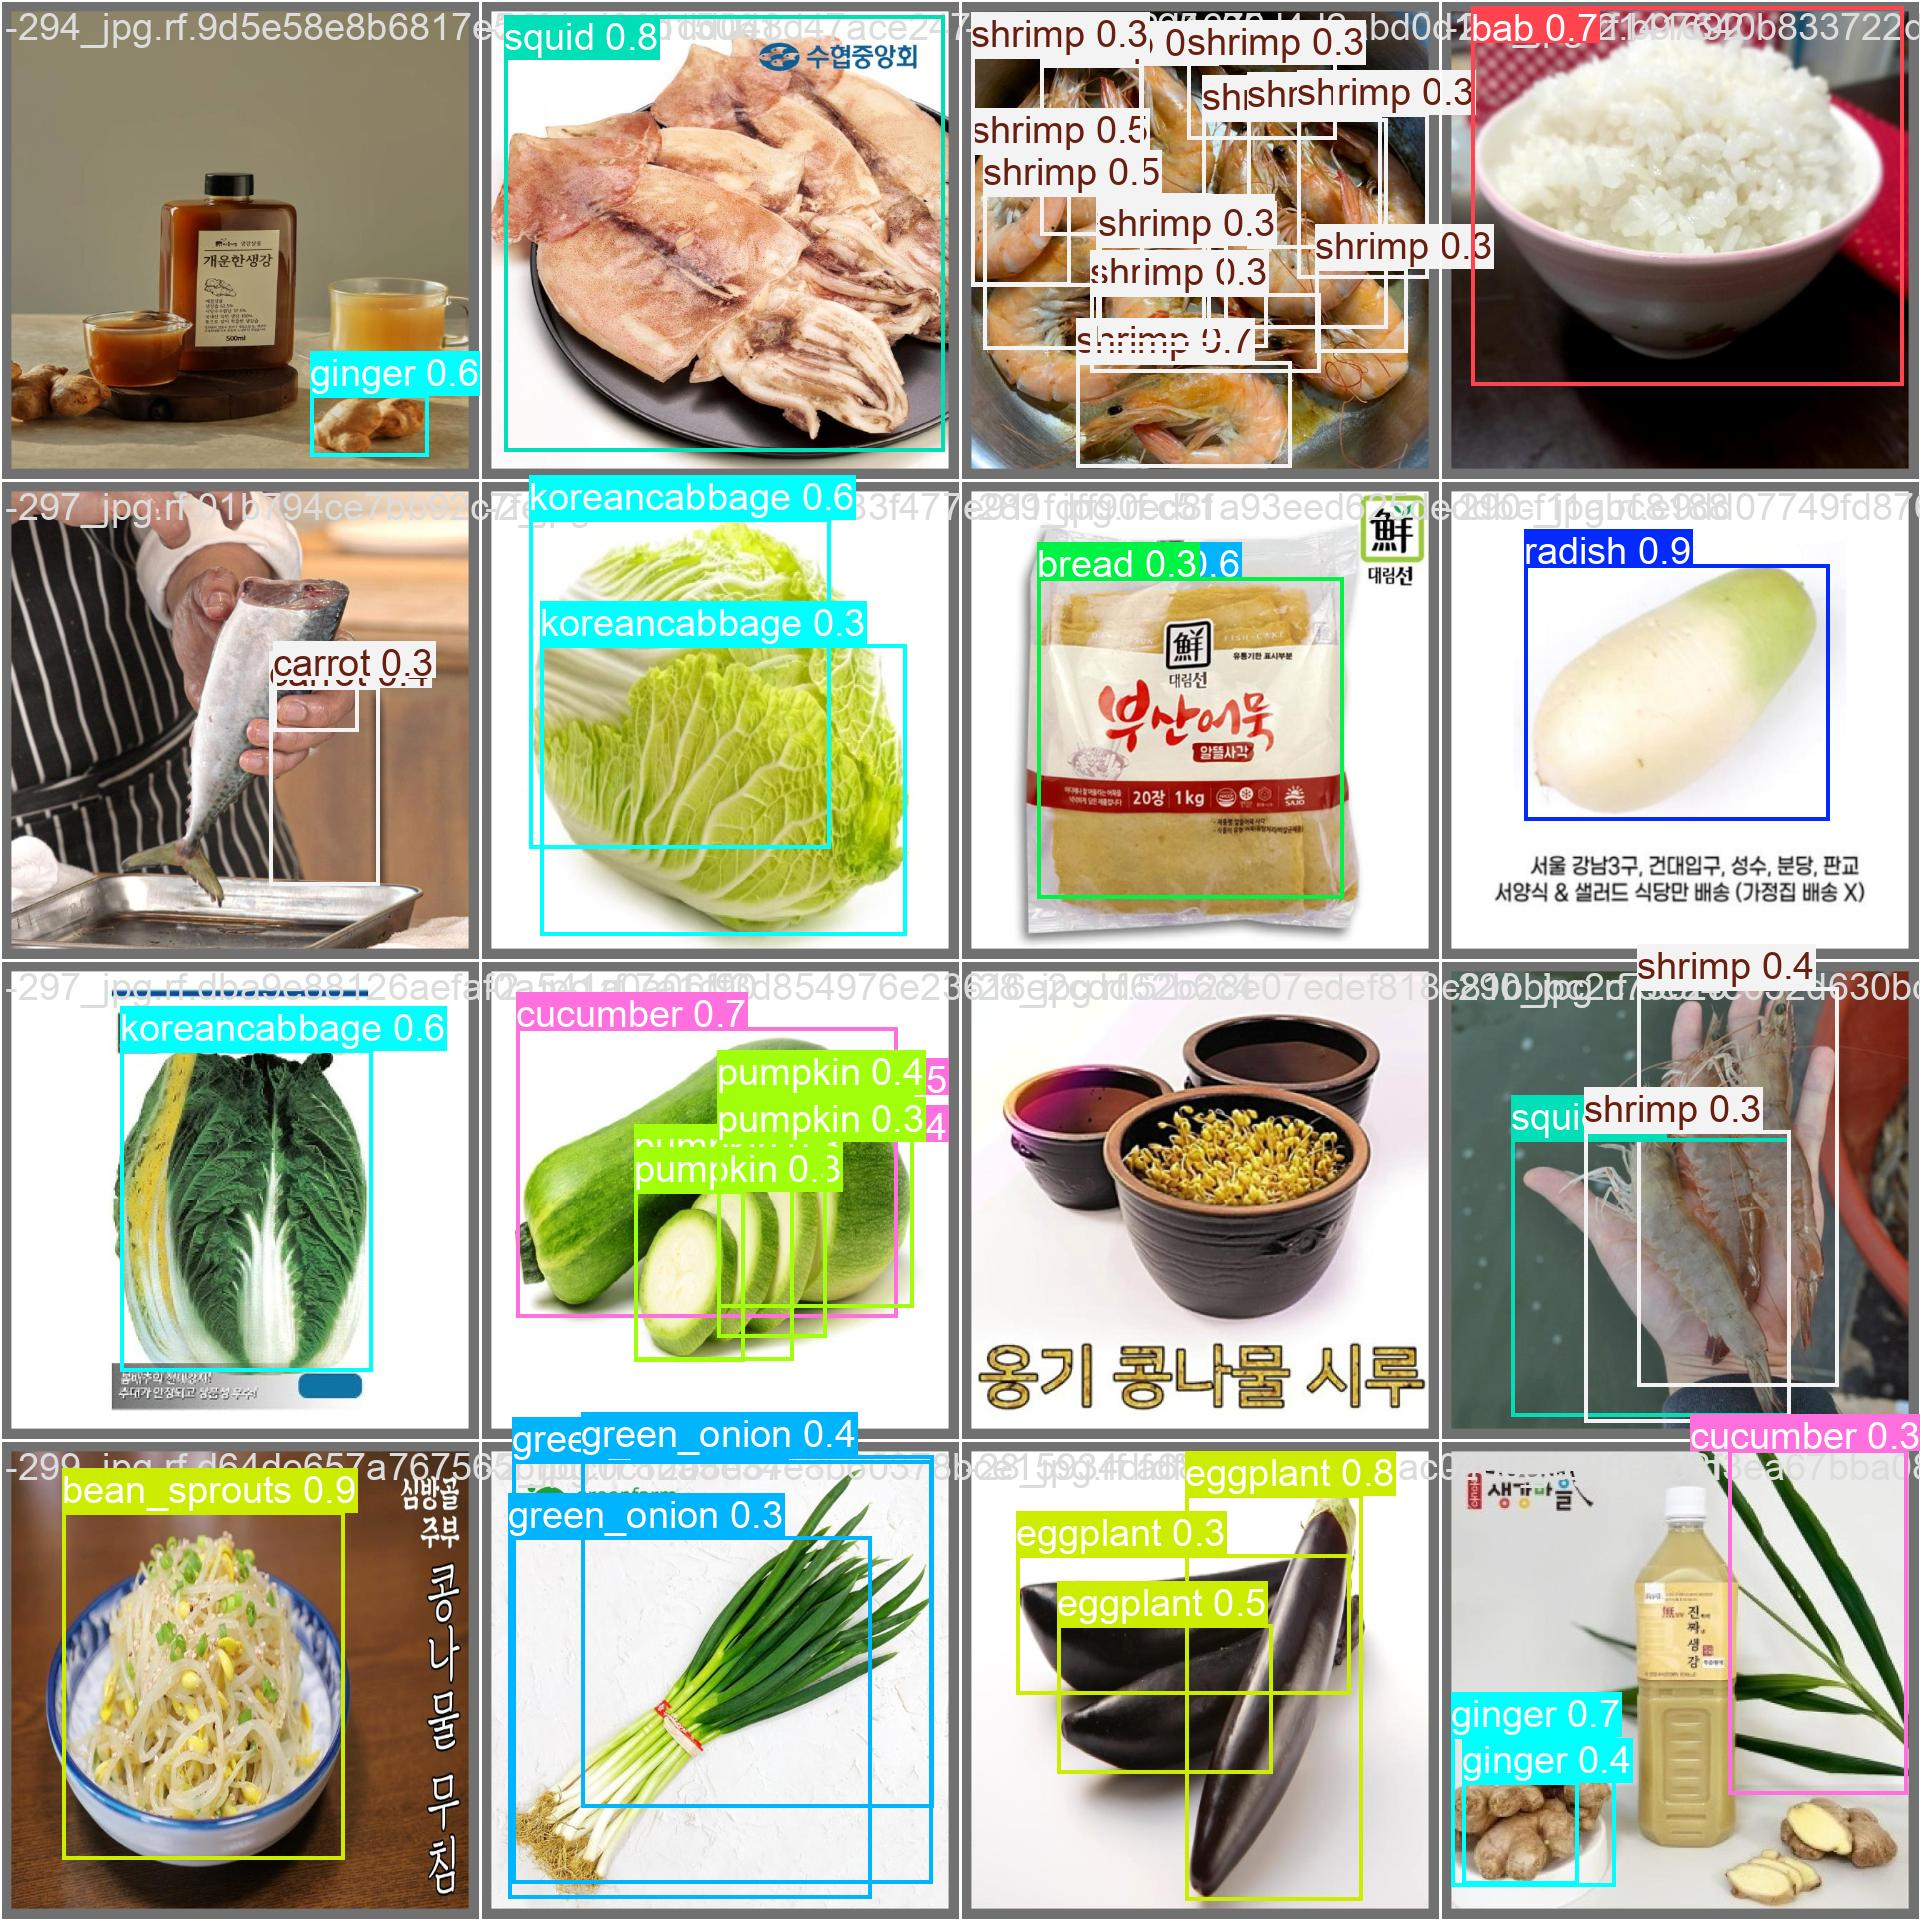

In [ ]:
# 추론 이미지 시각화
from IPython.display import Image, display
image_path = '/content/ultralytics/runs/detect/train/val_batch2_pred.jpg'
display(Image(filename=image_path))

In [ ]:
# 7월 4일자 최선의 성능을 지닌 모델로 추가학습 및 추론해보기
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/0704'
model = YOLO(os.path.join(checkpoint_dir, 'best.pt'))
model.train(data=data_yaml, epochs=100, imgsz=640, batch=32, cache=True)

Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DAB/checkpoints/0704/best.pt, data=/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

train: Scanning /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/Data_Food_Ingredients_0803/train/labels.cache... 49297 images, 2554 backgrounds, 0 corrupt: 100%|██████████| 51842/51842 [00:00<?, ?it/s]


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 87, len(boxes) = 121344. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
train: 86.9GB RAM required to cache images with 50% safety margin but only 73.1/83.5GB available, not caching images ⚠️
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/Data_Food_Ingredients_0803/valid/labels.cache... 2200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2200/2200 [00:00<?, ?it/s]
val: Caching images (2.5GB RAM): 100%|██████████| 2200/2200 [00:06<00:00, 326.95it/s]


Plotting labels to /content/ultralytics/runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/ultralytics/runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       5.3G     0.9954      2.093      1.371         12        640: 100%|██████████| 1621/1621 [04:23<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.07it/s]


                   all       2200       5368      0.688      0.683       0.71      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.64G     0.9625      1.335      1.338         21        640: 100%|██████████| 1621/1621 [04:21<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.13it/s]


                   all       2200       5368      0.723      0.709      0.752      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.61G      0.992      1.232      1.357         14        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.07it/s]


                   all       2200       5368      0.659      0.688      0.745      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.98G      1.032      1.224      1.391          3        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.07it/s]


                   all       2200       5368      0.706      0.685       0.72      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.18G      1.015      1.163      1.382          7        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.18it/s]


                   all       2200       5368      0.718      0.696      0.743      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.13G      1.001      1.133      1.374         10        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.10it/s]

                   all       2200       5368      0.792      0.712      0.797      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.87G     0.9905      1.102      1.369          7        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.12it/s]

                   all       2200       5368      0.739      0.739      0.795      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.66G     0.9759      1.077      1.358          2        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.06it/s]

                   all       2200       5368      0.787      0.739      0.804      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.21G     0.9671       1.06      1.353          9        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all       2200       5368      0.813       0.77      0.832      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       4.7G     0.9592      1.038      1.347         19        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.20it/s]

                   all       2200       5368      0.825      0.746      0.831      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       4.6G     0.9481      1.023       1.34         11        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.11it/s]

                   all       2200       5368      0.829      0.762      0.847      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.13G     0.9482      1.014      1.338          6        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.21it/s]

                   all       2200       5368       0.84      0.766      0.855      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       5.1G     0.9371     0.9991      1.332          8        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.08it/s]

                   all       2200       5368      0.835      0.778      0.852      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.07G     0.9348     0.9855      1.329          7        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.08it/s]

                   all       2200       5368      0.831      0.786      0.861      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.11G     0.9294     0.9745      1.326          7        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.03it/s]

                   all       2200       5368      0.842      0.782       0.86      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       5.6G     0.9243     0.9701      1.323         13        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.09it/s]

                   all       2200       5368      0.843      0.791      0.865      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.02G     0.9203     0.9603      1.321          6        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.16it/s]

                   all       2200       5368      0.844      0.799      0.869      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       5.2G     0.9161      0.953      1.317         15        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.16it/s]

                   all       2200       5368      0.834      0.802       0.87      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.59G     0.9103     0.9467      1.313         10        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.838      0.798      0.869      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.63G     0.9055     0.9357      1.309         12        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.10it/s]

                   all       2200       5368      0.829      0.814      0.869      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.13G     0.9034     0.9302      1.306          8        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.09it/s]

                   all       2200       5368      0.835      0.807      0.867       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       5.3G     0.9006     0.9229      1.308          8        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.03it/s]

                   all       2200       5368      0.842       0.81       0.87      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.09G     0.8999     0.9225      1.307         11        640: 100%|██████████| 1621/1621 [04:17<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.10it/s]

                   all       2200       5368      0.845      0.809      0.872      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.2G     0.8959     0.9157      1.304          7        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.06it/s]

                   all       2200       5368      0.846      0.816      0.874      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.12G     0.8901     0.9099      1.301          9        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.06it/s]

                   all       2200       5368      0.845      0.816      0.873      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.53G     0.8875     0.8997      1.299          5        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.01it/s]

                   all       2200       5368      0.848      0.817      0.876      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.26G     0.8888     0.8957      1.296         12        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.20it/s]

                   all       2200       5368      0.849      0.814      0.875      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.61G     0.8851     0.8942      1.295          6        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.06it/s]

                   all       2200       5368      0.851      0.812      0.876      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       5.1G     0.8815     0.8889      1.292         12        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.13it/s]

                   all       2200       5368      0.851      0.811      0.876      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.14G     0.8787     0.8836      1.292          8        640: 100%|██████████| 1621/1621 [04:22<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.07it/s]

                   all       2200       5368      0.848      0.815      0.876      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.91G     0.8759     0.8839      1.289          6        640: 100%|██████████| 1621/1621 [04:21<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.13it/s]

                   all       2200       5368      0.853      0.815      0.876      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.93G     0.8666     0.8681      1.283          4        640: 100%|██████████| 1621/1621 [04:22<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.12it/s]

                   all       2200       5368      0.857      0.817      0.878      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       5.6G     0.8722     0.8752      1.286          4        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all       2200       5368      0.854      0.819      0.879      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.61G     0.8691     0.8695      1.285         14        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.08it/s]

                   all       2200       5368      0.857      0.818       0.88      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.11G     0.8649     0.8635      1.281         12        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.02it/s]

                   all       2200       5368      0.861      0.816       0.88      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.63G     0.8628     0.8568       1.28         10        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.18it/s]

                   all       2200       5368      0.866      0.813      0.879      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.42G     0.8598     0.8539      1.277         12        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.13it/s]

                   all       2200       5368      0.862      0.813       0.88      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.63G     0.8542     0.8467      1.274          8        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.861      0.813       0.88      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.63G     0.8543     0.8429      1.274          9        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.20it/s]

                   all       2200       5368      0.864      0.812      0.878      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.67G     0.8528      0.846      1.273         12        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all       2200       5368      0.868      0.807      0.877       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.11G     0.8494     0.8384      1.272         14        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all       2200       5368       0.87       0.81      0.877      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.69G     0.8461     0.8361       1.27         14        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all       2200       5368      0.871       0.81      0.879      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.48G     0.8467     0.8318      1.267         16        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all       2200       5368      0.871      0.813       0.88      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.14G     0.8396     0.8239      1.265          4        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.11it/s]

                   all       2200       5368      0.872      0.816      0.881      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.49G     0.8406     0.8174      1.264         12        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all       2200       5368      0.865      0.819      0.882      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.93G     0.8364     0.8173      1.261          8        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.13it/s]

                   all       2200       5368      0.867      0.817      0.883      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.43G      0.835     0.8125       1.26          5        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.09it/s]

                   all       2200       5368      0.863      0.817      0.882      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.61G     0.8329     0.8112       1.26         12        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.12it/s]

                   all       2200       5368      0.867      0.818      0.884      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       4.9G     0.8305     0.8061      1.258         10        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.05it/s]

                   all       2200       5368      0.867      0.823      0.883      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.09G     0.8294     0.8036      1.256         14        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.867      0.825      0.884      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       5.1G     0.8271     0.7981      1.254          6        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.867      0.829      0.886      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.13G     0.8238     0.7985      1.253         13        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.867      0.827      0.886      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       5.1G     0.8223     0.7899       1.25          7        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.19it/s]

                   all       2200       5368      0.869      0.828      0.885      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.86G     0.8208     0.7866      1.248          7        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.18it/s]

                   all       2200       5368      0.871      0.828      0.885       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.07G      0.817     0.7865      1.248         10        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.14it/s]

                   all       2200       5368       0.87       0.83      0.885      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.15G     0.8136     0.7765      1.245          3        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.18it/s]

                   all       2200       5368       0.87      0.829      0.886      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.21G     0.8138     0.7774      1.244          7        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all       2200       5368      0.871      0.833      0.887      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.38G     0.8071     0.7698      1.242         10        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.13it/s]

                   all       2200       5368      0.871      0.834      0.886      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       5.2G     0.8047     0.7665      1.237          8        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.14it/s]

                   all       2200       5368      0.869      0.831      0.887      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.59G     0.8017     0.7615      1.238          9        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.13it/s]

                   all       2200       5368      0.866      0.831      0.887      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       5.1G     0.8026     0.7606      1.238          3        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.12it/s]

                   all       2200       5368      0.871      0.828      0.889      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.11G     0.8004     0.7567      1.235          5        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.12it/s]

                   all       2200       5368      0.871       0.83      0.889      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.18G     0.7976      0.754      1.235          3        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all       2200       5368      0.868      0.829      0.889      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.47G      0.793     0.7454      1.231          7        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.869       0.83      0.891        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.08G     0.7916     0.7454      1.231          9        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.16it/s]

                   all       2200       5368      0.869      0.829      0.891      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.08G     0.7892     0.7447      1.229          5        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.14it/s]

                   all       2200       5368      0.868      0.829      0.893      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.09G       0.79     0.7398      1.228         10        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.16it/s]

                   all       2200       5368      0.864      0.833      0.893      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.06G     0.7866     0.7339      1.225          7        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.868      0.827      0.893      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.08G     0.7807     0.7292      1.222         12        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.18it/s]

                   all       2200       5368      0.883       0.82      0.896      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.62G     0.7753     0.7229      1.219          5        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all       2200       5368      0.878      0.824      0.896      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.28G      0.776     0.7201      1.219          5        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.18it/s]

                   all       2200       5368      0.884      0.821      0.897      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       5.1G     0.7733     0.7172      1.216          3        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.16it/s]

                   all       2200       5368       0.89      0.819      0.897      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.21G     0.7693     0.7131      1.215         15        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.896       0.82      0.897      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       5.1G     0.7668     0.7058      1.212          8        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all       2200       5368      0.897      0.817      0.896      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.85G     0.7648     0.7031       1.21          5        640: 100%|██████████| 1621/1621 [04:18<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.09it/s]

                   all       2200       5368      0.895      0.821      0.896      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.46G     0.7615      0.699      1.208          4        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.891      0.822      0.896      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.22G       0.76     0.6955      1.206         13        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.11it/s]

                   all       2200       5368      0.897      0.821      0.897       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.11G     0.7528     0.6878      1.203         10        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.11it/s]

                   all       2200       5368      0.899       0.82      0.897       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.16G      0.751     0.6889      1.202          6        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.898      0.821      0.897       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.14G       0.75     0.6828      1.201         13        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.14it/s]

                   all       2200       5368       0.89      0.825      0.898      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.21G     0.7445     0.6787      1.197          4        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.892      0.826      0.898      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.19G     0.7447      0.678      1.199         11        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.898      0.826      0.899      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       4.6G     0.7374     0.6683      1.194         13        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all       2200       5368      0.888      0.834      0.899      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.55G     0.7356     0.6633      1.191          9        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.888      0.832      0.898      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       5.6G     0.7311     0.6548      1.189          6        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.19it/s]

                   all       2200       5368       0.89      0.829      0.898      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.66G     0.7291     0.6559      1.187          5        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.19it/s]

                   all       2200       5368      0.892      0.829      0.898      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.13G     0.7252     0.6502      1.185         12        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all       2200       5368      0.894      0.828      0.898      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       5.1G      0.723     0.6471      1.184         39        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all       2200       5368      0.885      0.834      0.899      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       4.6G     0.7167     0.6383      1.179          6        640: 100%|██████████| 1621/1621 [04:19<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.08it/s]

                   all       2200       5368      0.889       0.83      0.898      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.15G     0.7133     0.6341      1.179         14        640: 100%|██████████| 1621/1621 [04:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.20it/s]

                   all       2200       5368      0.891      0.831      0.896      0.717


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.23G     0.6437     0.4696      1.156          5        640: 100%|██████████| 1621/1621 [04:12<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.04it/s]

                   all       2200       5368      0.893      0.834      0.899      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.02G     0.6291      0.452      1.148          3        640: 100%|██████████| 1621/1621 [04:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.13it/s]

                   all       2200       5368      0.892      0.831      0.897      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.85G     0.6197     0.4439      1.138          3        640: 100%|██████████| 1621/1621 [04:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all       2200       5368      0.892      0.831      0.896      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.23G     0.6098     0.4327      1.131          3        640: 100%|██████████| 1621/1621 [04:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all       2200       5368      0.895      0.826      0.895       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.01G     0.6034     0.4261      1.127          2        640: 100%|██████████| 1621/1621 [04:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.16it/s]

                   all       2200       5368       0.89       0.83      0.896      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       4.6G     0.5981     0.4197      1.121          3        640: 100%|██████████| 1621/1621 [04:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all       2200       5368      0.892      0.831      0.896      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.06G     0.5893     0.4107      1.115          6        640: 100%|██████████| 1621/1621 [04:10<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.14it/s]

                   all       2200       5368      0.894       0.83      0.896      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       5.2G     0.5821     0.4056       1.11          4        640: 100%|██████████| 1621/1621 [04:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.12it/s]

                   all       2200       5368      0.889      0.832      0.896      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.85G     0.5742     0.3991      1.105         11        640: 100%|██████████| 1621/1621 [04:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all       2200       5368      0.894      0.831      0.896      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.08G      0.568     0.3932      1.099          2        640: 100%|██████████| 1621/1621 [04:10<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all       2200       5368      0.889      0.832      0.896      0.723



100 epochs completed in 7.441 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from /content/ultralytics/runs/detect/train3/weights/best.pt, 6.3MB

Validating /content/ultralytics/runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,012,668 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.92it/s]


                   all       2200       5368      0.892       0.83      0.895      0.724
                  beaf        160        227      0.968      0.907      0.975        0.9
            bellpepper         22        103      0.941      0.768      0.854      0.655
                carrot        236       1070      0.933      0.828       0.93      0.763
               chicken        164        305      0.952      0.931      0.977      0.879
              cucumber        151        366      0.959      0.837      0.935      0.804
                   egg        133        577      0.991      0.981      0.995      0.934
              eggplant        159        337      0.978      0.869      0.963      0.813
                garlic         14         59      0.868      0.669      0.751       0.56
           green_onion        111        137       0.93      0.803      0.913      0.751
                kimchi         10         10      0.744        0.9      0.903      0.714
         koreancabbag

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  5,  6,  7,  9, 10, 11, 12, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c559c67c850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.0

Save & Inference (영빈아 내가 추가했어)

In [1]:
import os
# yolov8 실행결과 디렉토리 경로
result_directory = '/content/ultralytics/runs/detect/train3'
# yolov8 실행결과 디렉토리의 파일 및 디렉토리 목록 출력
print(f"result_directory: {result_directory}")
for item in os.listdir(result_directory):
    print(item)

result_directory: /content/ultralytics/runs/detect/train3


FileNotFoundError: [Errno 2] No such file or directory: '/content/ultralytics/runs/detect/train3'

In [ ]:
# Checkpoint 생성
best_model_path = '/content/ultralytics/runs/detect/train3/weights/best.pt'
last_model_path = '/content/ultralytics/runs/detect/train3/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0803/best.pt'
drive_last_model_path = '/content/drive/MyDrive/DAB/checkpoints/0803/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

NameError: name 'os' is not defined

In [ ]:
# Validation image set에 대한 추론 결과 시각화
from IPython.display import Image, display
image_path = '/content/ultralytics/runs/detect/train3/val_batch1_pred.jpg'
display(Image(filename=image_path, width=1500, height=1000))

In [ ]:
# 처음 마주하는 이미지에 대한 추론 시각화
results = model('/content/drive/MyDrive/DAB/tmp4.jpg')
results[0].plot()  # 첫 번째 이미지의 결과 시각화